# Credit Card

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [25]:
card_df = pd.read_csv('creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:xlabel='Amount', ylabel='Density'>

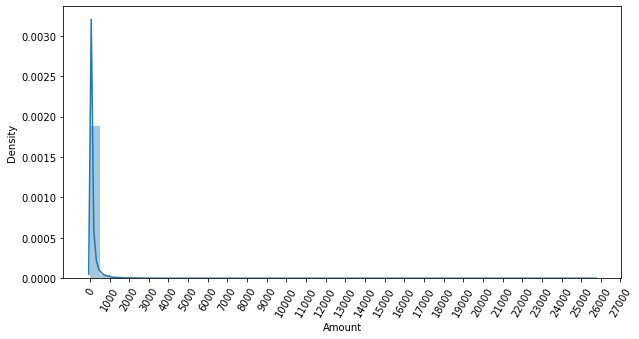

In [26]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.xticks(range(0,30000,1000),rotation=60)
sns.distplot(card_df['Amount'])

In [27]:
 from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy=get_preprocessed_df(df)
    X_features=df_copy.iloc[:,:-1]
    y_target=df_copy.iloc[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=0,stratify=y_target)
    return X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)


학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
    
def get_model_train_eval(model, feature_train=None, feature_test=None, target_train=None, target_test=None):
    model.fit(feature_train, target_train)
    pred=model.predict(feature_test)
    pred_proba=model.predict_proba(feature_test)[:,1]
    confusion=confusion_matrix(target_test,pred)
    accuracy=accuracy_score(target_test,pred)
    precision=precision_score(target_test,pred)
    recall=recall_score(target_test,pred)
    f1=f1_score(target_test,pred)
    roc_auc=roc_auc_score(target_test,pred_proba)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))


In [30]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lr_clf=LogisticRegression()
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)

print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train,X_test,y_train,y_test)

ModuleNotFoundError: No module named 'lightgbm'

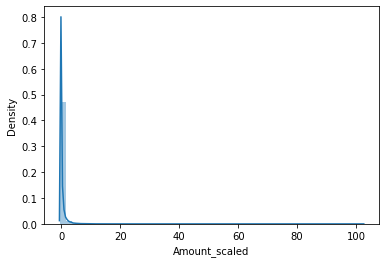

In [31]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    scaler=StandardScaler()
    amount_StandardScaled=scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0,'Amount_scaled',amount_StandardScaled)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    sns.distplot(df_copy['Amount_scaled'])
    return df_copy

X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

In [37]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lr_clf=LogisticRegression()
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)

print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train,X_test,y_train,y_test)


로지스틱 회귀 성능
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC: 0.9743
LightGBM 성능
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC: 0.9780


In [38]:
lr_clf=LogisticRegression()
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)

print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train,X_test,y_train,y_test)

로지스틱 회귀 성능
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC: 0.9743
LightGBM 성능
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC: 0.9780


<AxesSubplot:>

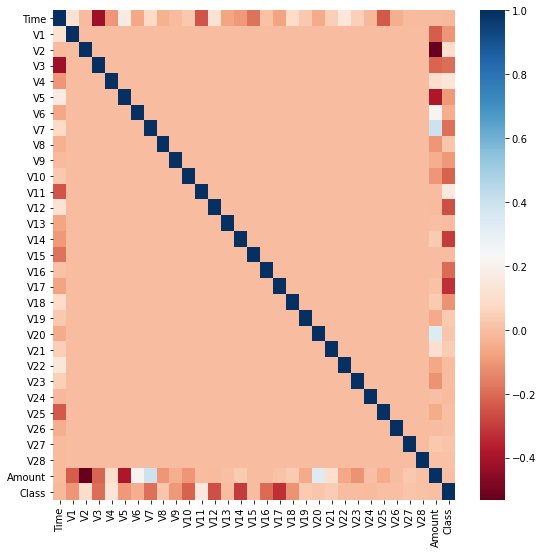

In [39]:
plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr,cmap='RdBu')

In [40]:
import numpy as np

def get_outlier(df,column,weight=1.5):
    fraud=df[df['Class']==1][column]
    quantile_25=np.percentile(fraud.values,25)
    quantile_75=np.percentile(fraud.values,75)
    iqr=quantile_75-quantile_25
    iqr_weighted=iqr*weight
    lowest_val=quantile_25-iqr_weighted
    highest_val=quantile_75+iqr_weighted
    outlier_index=fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    return outlier_index

outlier_index_V14=get_outlier(card_df,'V14',1.5)
print('V14 이상치 데이터 인덱스: ',outlier_index_V14)
outlier_index_V17=get_outlier(card_df,'V17',1.5)
print('V17 이상치 데이터 인덱스: ',outlier_index_V17)

V14 이상치 데이터 인덱스:  Int64Index([8296, 8615, 9035, 9252], dtype='int64')
V17 이상치 데이터 인덱스:  Int64Index([], dtype='int64')


In [41]:
def get_preprocessed_df(df):
    df_copy=df.copy()
    amount_log_Scaled=np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_log_Scaled)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    outlier_index_V14=get_outlier(df_copy,'V14',1.5)
    df_copy.drop(outlier_index_V14,axis=0,inplace=True)
    return df_copy

print('V14 이상치 제거')
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train,X_test, y_train, y_test)

V14 이상치 제거
로지스틱 회귀 성능
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC: 0.9743
LightGBM 성능
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC: 0.9780
